**Test**

You need to create an algorithm that can find outliers in this data by one column / several columns. 

E.g. some members have extremely high costs in the current month and your solution should be able to detect such records. Think about features and how you would explain them to business people.

- member_unique_id - member's ID
- gender - member's gender
- dob - member's date of birth
- eligible_year - year
- eligible_month - month
- affiliation_type - doctor's type
- pbp_group - health plan group
- plan_name - health plan name
- npi - doctor's ID
- line_of_business - health plan type
- esrd - True if patient is on dialysis
- hospice - True if patient is in hospice

## General Overlook

In [5]:
import pandas as pd

df = pd.read_csv('sfr_test.csv')
df.head()
df.sample(n=5, random_state=24)

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
1006,1007,M,25/05/1953,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,10,HMO,...,$0.00,"$20,805.60",$0.00,$8.61,$0.00,$1.34,$0.00,$1.58,$1.49,"$1,007.10"
2076,2077,M,03/08/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,19,HMO,...,$0.00,"$9,837.39",$0.00,$8.18,$0.00,$0.00,$0.00,$0.00,$0.00,$705.31
4294,4295,F,20/09/1938,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,33,HMO,...,$0.00,"$13,955.42",$0.00,$8.06,$0.00,$0.00,$0.00,$0.00,$0.00,$736.58
8475,8476,F,08/03/1963,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,72,HMO,...,$0.00,"$5,263.19",$0.00,$9.15,$0.00,$0.00,$0.00,$0.00,$0.00,"$1,310.79"
2340,2341,M,28/10/1951,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,20,HMO,...,$0.00,"$36,354.63",$0.00,$9.02,$0.00,"$2,208.64",$0.00,"$2,113.55","$2,243.04",$823.83


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10530 entries, 0 to 10529
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   member_unique_id     10530 non-null  int64 
 1   gender               10530 non-null  object
 2   dob                  10530 non-null  object
 3   eligible_year        10530 non-null  int64 
 4   eligible_month       10530 non-null  int64 
 5   affiliation_type     10530 non-null  object
 6   pbp_group            10530 non-null  object
 7   plan_name            6606 non-null   object
 8   npi                  10530 non-null  int64 
 9   line_of_business     10530 non-null  object
 10  esrd                 10530 non-null  bool  
 11  hospice              10530 non-null  bool  
 12  ipa_funding          10530 non-null  object
 13  ma_premium           10530 non-null  object
 14  ma_risk_score        10530 non-null  object
 15  mbr_with_rx_rebates  10530 non-null  object
 16  part

In [14]:
financial_columns = [col for col in df.columns if df[col].dtype == 'O' and any('$' in str(x) for x in df[col])]
pd.set_option('display.max_columns', None)  # Display all columns
pd.DataFrame(financial_columns, columns=['Financial Columns'])

,Financial Columns
0,ipa_funding
1,ma_premium
2,ma_risk_score
3,mbr_with_rx_rebates
4,partd_premium
5,pcp_cap
6,pcp_ffs
7,plan_premium
8,prof
9,reinsurance


In [15]:
df[financial_columns] = df[financial_columns].replace('[\$,]', '', regex=True).astype(float)


### Uni-Variate Outlier Detection

In [16]:
df[financial_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ipa_funding,10530.0,10657.849594,7690.191694,1302.36,5390.6450,8723.135,13444.6325,113850.93
ma_premium,10530.0,12311.727551,8955.579076,1394.85,6200.2550,10060.455,15479.8400,155112.65
ma_risk_score,10530.0,14.601082,11.398322,0.00,6.5025,11.740,18.9200,174.60
mbr_with_rx_rebates,10530.0,500.425354,1130.533796,13.94,197.2100,312.365,499.3525,32687.50
partd_premium,10530.0,281.523642,239.155174,8.62,130.7800,220.590,352.0325,3120.53
pcp_cap,10530.0,507.875923,269.436836,0.00,503.0200,613.500,684.2600,833.33
pcp_ffs,10530.0,44.715122,279.992983,0.00,0.0000,0.000,0.0000,6056.44
plan_premium,10530.0,12622.875903,9165.144567,1295.18,6362.8100,10317.105,15886.7650,138352.50
prof,10530.0,407.262296,1787.161653,0.00,0.0000,0.000,0.0000,69516.96
reinsurance,10530.0,8.728322,0.505910,7.91,8.2900,8.690,9.1600,9.67


#### Using IQR to find columns with outliers

In [21]:
import numpy as np

# Detect outliers using IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers for each column
outliers = df[financial_columns].apply(detect_outliers)

# Count outliers for each column
outliers_count = outliers.sum()

top_5_outliers_columns = outliers_count.sort_values(ascending=False).head()

print("Top 5 Columns with the Most Outliers:")
print(top_5_outliers_columns)


Top 5 Columns with the Most Outliers:
pcp_cap               2182
prof                  1847
rx_with_rebates       1624
rx                    1620
rx_without_rebates    1619
dtype: int64


In [17]:
# Since values of 'risk_score_partd' and 'rx_rebates' are all 0, we will exclude these columns
financial_columns.remove("risk_score_partd")
financial_columns.remove("rx_rebates")

#### Plot boxplot to visualize outliers

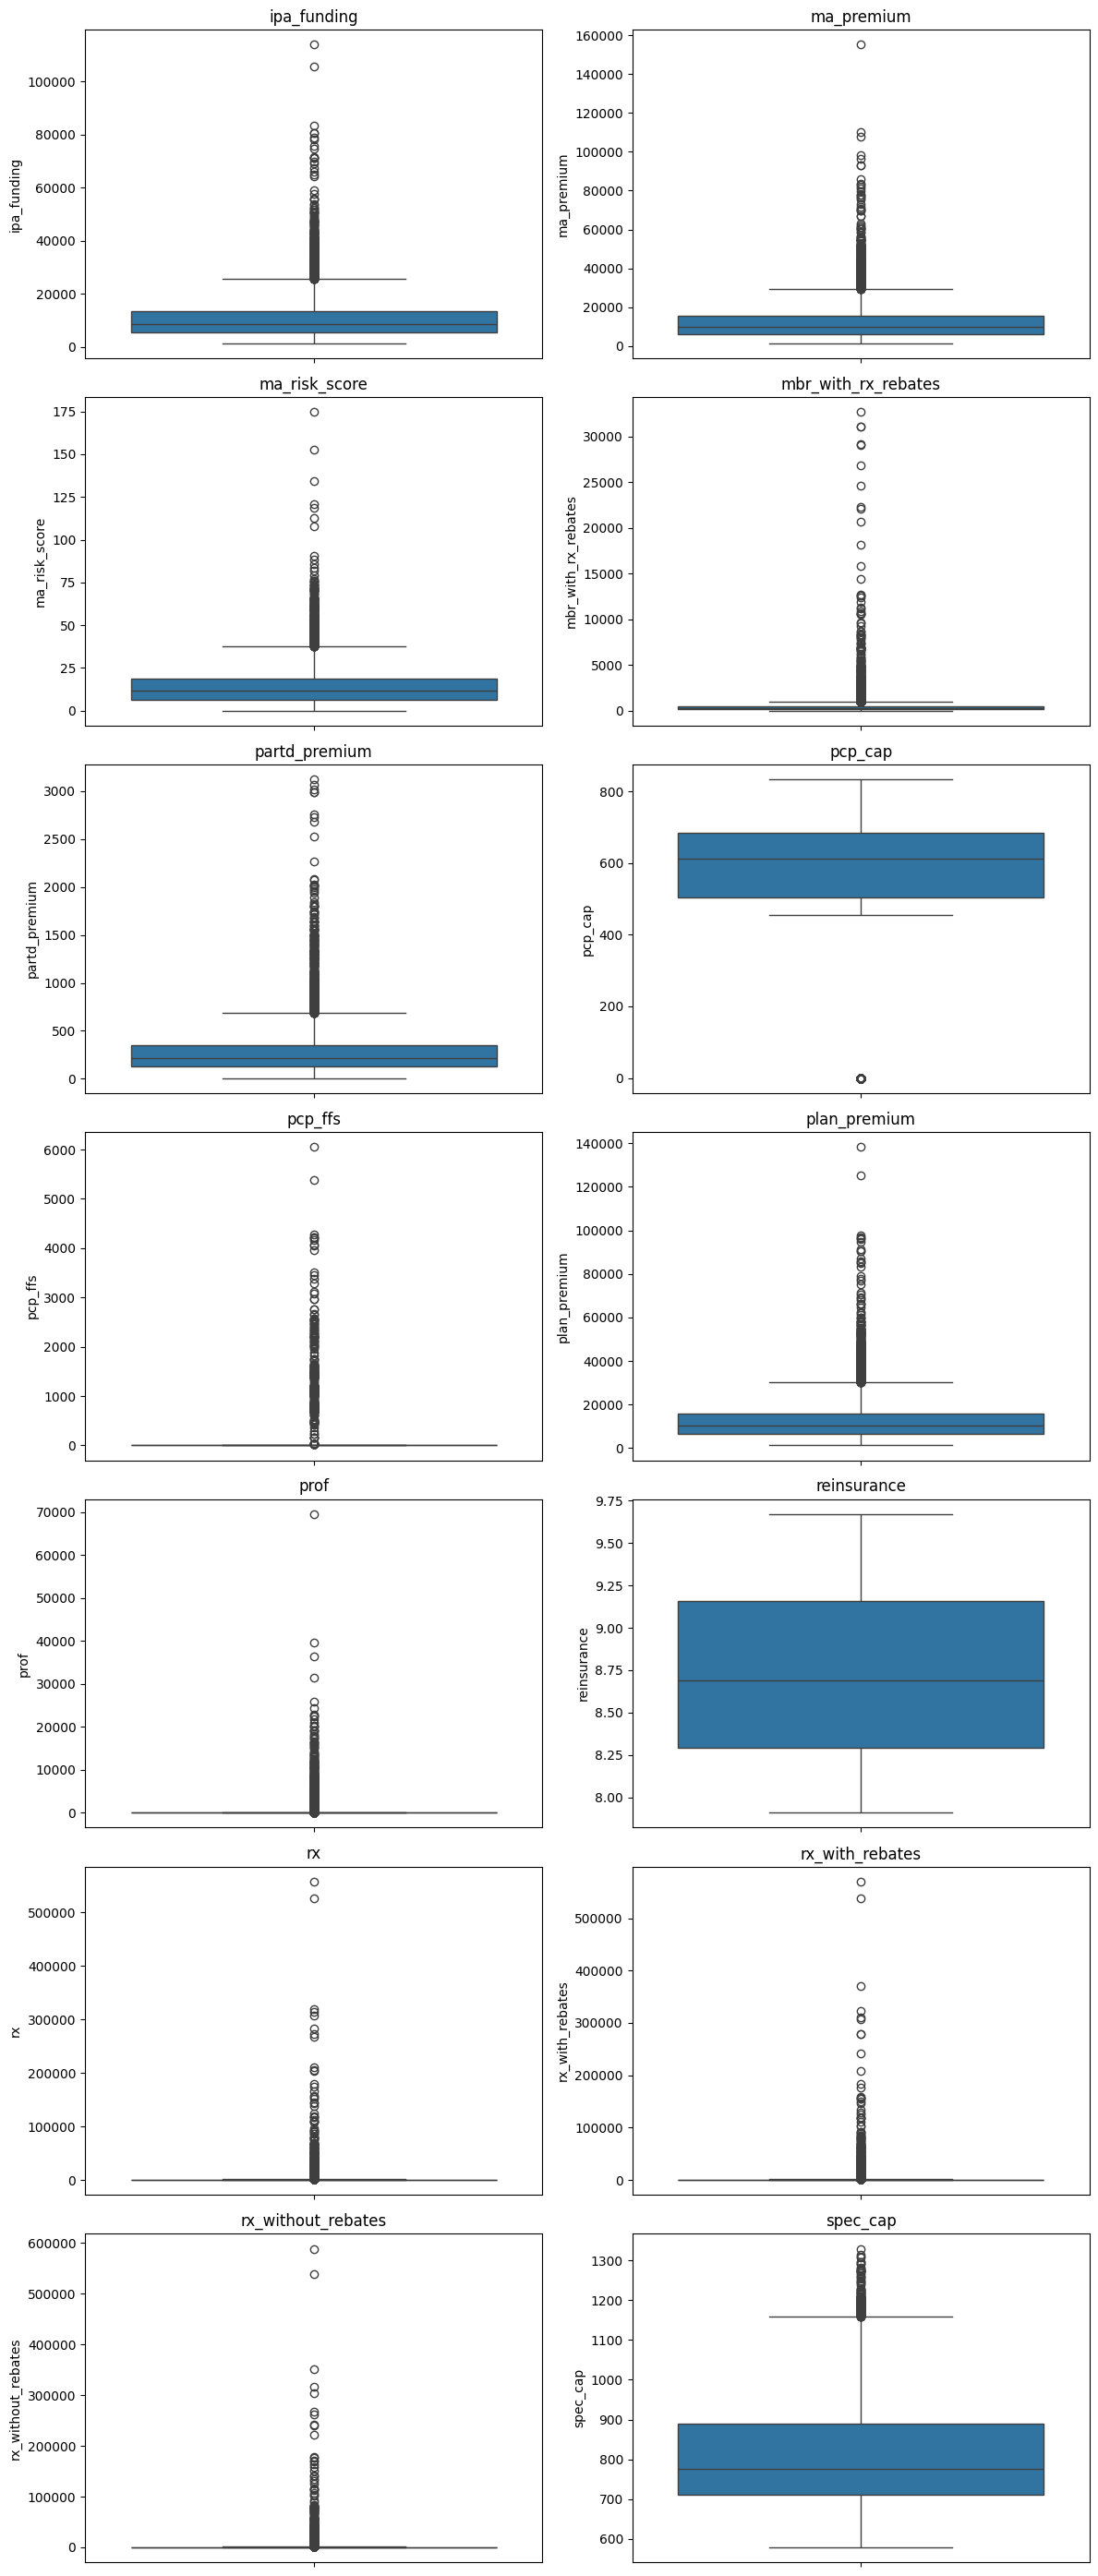

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plots_per_row = 2
num_rows = (len(financial_columns) + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(12, 4*num_rows))

# Create boxplots
for i, financial_column in enumerate(financial_columns):
    row = i // plots_per_row
    col = i % plots_per_row
    ax = axs[row][col]
    sns.boxplot(data=df[financial_column], ax=ax)
    ax.set_title(financial_column)

plt.tight_layout()
plt.show()


#### Plot distribution of values

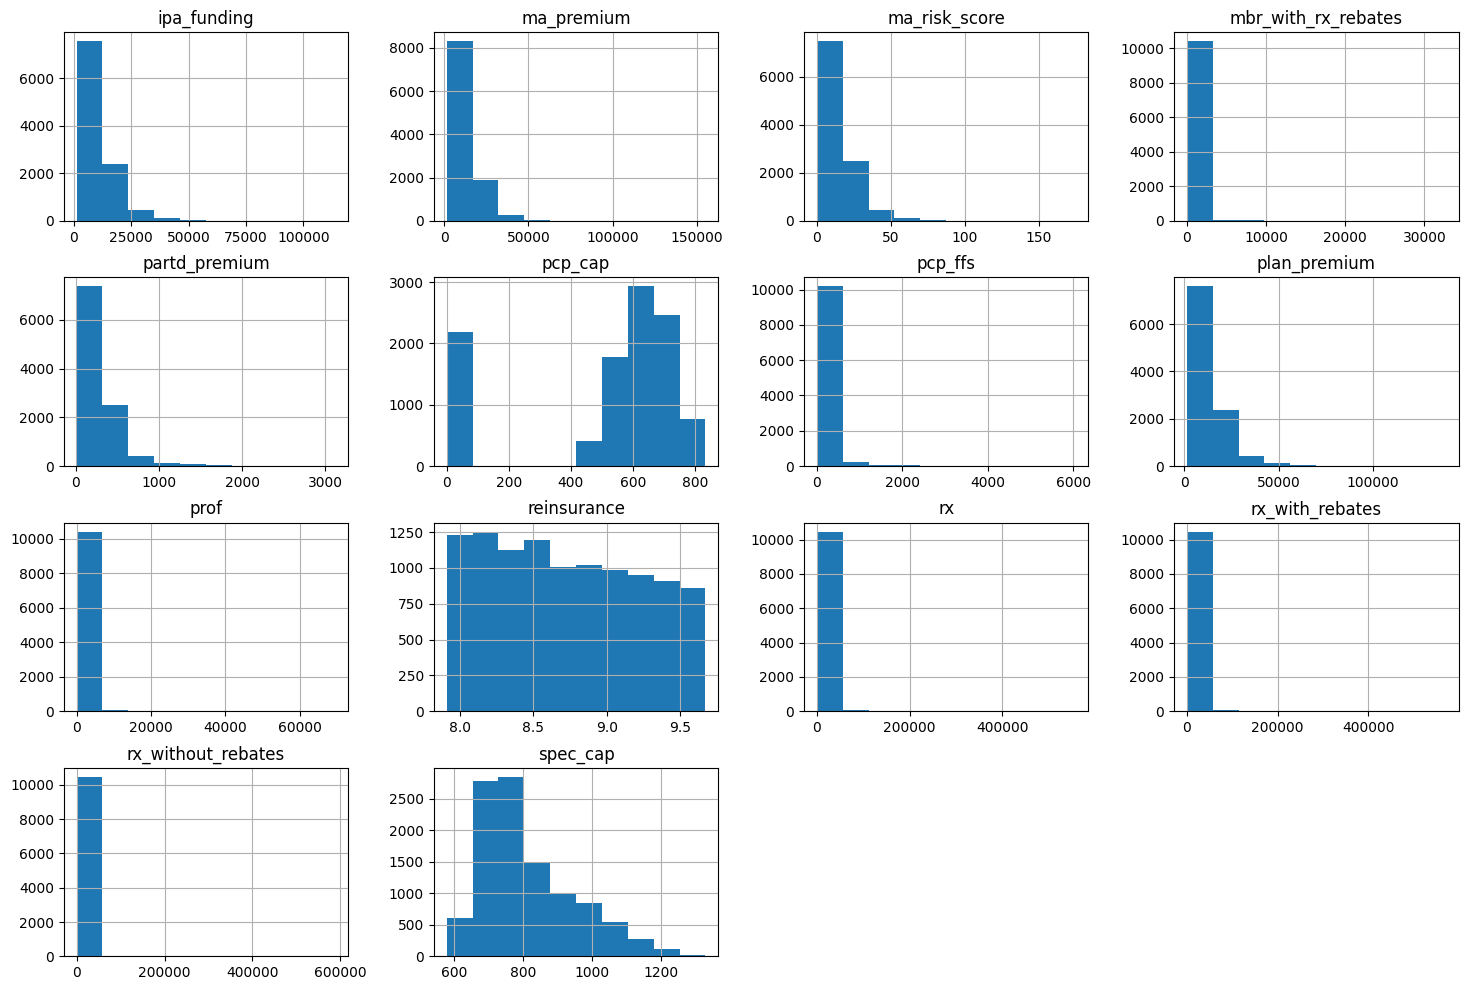

In [31]:
_ = df[financial_columns].hist(figsize=(18, 12))

#### Using standardization (threshold = 3&sigma; away)

In [34]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df[financial_columns]))

print(np.where(z>3))

(array([    4,    62,    62, ..., 10513, 10513, 10513], dtype=int64), array([8, 0, 1, ..., 1, 2, 7], dtype=int64))


In [49]:
outliers = df[financial_columns][(z>3).any(axis=1)]
print(len(outliers))
df.iloc[outliers.index]

791


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,esrd,hospice,ipa_funding,ma_premium,ma_risk_score,mbr_with_rx_rebates,partd_premium,pcp_cap,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,False,False,17456.26,17590.58,25.55,810.83,210.62,527.98,0.0,19976.13,8875.80,8.90,0.0,522.48,0.0,517.56,606.01,867.55
62,63,M,29/06/1944,2020,202006,Affiliate,D-SNP,NaN,1,HMO,False,False,43965.67,43457.05,48.03,862.64,691.94,523.56,0.0,52110.53,0.00,9.48,0.0,27513.95,0.0,30963.89,32025.88,957.09
107,108,M,18/05/1956,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,False,False,32605.21,35347.82,45.85,1106.89,1887.93,510.73,0.0,36986.52,0.00,8.82,0.0,34279.67,0.0,35680.20,35819.58,818.94
122,123,M,30/06/1960,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,False,False,20787.96,22565.75,26.83,805.86,779.45,504.54,0.0,26505.44,15684.94,9.19,0.0,370.58,0.0,443.31,381.42,941.42
130,131,F,07/03/1968,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,2,HMO,False,False,13007.14,13958.33,14.03,12612.16,1992.34,671.79,0.0,15987.45,0.00,9.62,0.0,180462.51,0.0,155800.97,170609.15,794.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10464,10465,F,15/11/1952,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,False,False,40511.24,44145.81,65.67,499.56,822.84,700.70,0.0,47530.73,0.00,8.58,0.0,16817.65,0.0,16056.29,15375.67,965.78
10467,10468,M,27/11/1962,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,False,False,53916.15,71714.16,88.30,65.21,902.26,737.62,0.0,68885.56,1464.21,9.34,0.0,0.00,0.0,0.00,0.00,849.53
10480,10481,M,28/06/1941,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,False,False,35254.10,45724.90,50.35,95.13,474.75,649.95,0.0,42951.59,383.18,8.61,0.0,519.83,0.0,558.89,547.31,988.67
10504,10505,M,18/04/1945,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,False,False,26294.77,27941.10,33.38,145.71,1384.08,662.25,0.0,27758.45,1074.61,9.50,0.0,151.94,0.0,140.86,137.64,944.89


In [48]:
outliers_row_indices = np.where(z > 3)[0]
unique_values, counts = np.unique(outliers_row_indices, return_counts=True)
outlier_counts = np.array((unique_values, counts)).T

# More than # of outliers
threshold = 7

outliers = [x for x in outlier_counts if x[1] > threshold]

indices = [i[0] for i in outliers]
print(len(indices))
df.iloc[indices]

5


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,esrd,hospice,ipa_funding,ma_premium,ma_risk_score,mbr_with_rx_rebates,partd_premium,pcp_cap,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
780,781,F,22/04/1965,2020,202006,Affiliate,NON-SNP,NaN,6,HMO,False,False,38995.88,45580.38,59.36,5531.05,852.07,0.00,0.00,53792.64,4355.27,8.12,0.0,210082.16,0.0,207571.22,221233.01,718.21
1558,1559,M,09/04/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,12,HMO,False,False,41135.00,50047.54,65.36,1655.62,1733.08,0.00,2569.72,52416.81,14883.56,9.24,0.0,53395.04,0.0,50224.55,50035.92,904.75
2930,2931,F,06/07/1946,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,23,HMO,False,False,34981.21,37930.57,64.76,4855.51,1479.95,765.03,0.00,45385.61,19028.78,8.62,0.0,144987.53,0.0,149322.70,134973.37,746.08
6497,6498,M,10/05/1961,2020,202006,VIPcare,NON-SNP,NaN,57,HMO,False,False,50798.23,54895.41,71.57,10578.74,452.12,637.52,0.00,54523.31,0.00,9.26,0.0,557883.96,0.0,570037.03,588346.57,803.13
8494,8495,M,23/03/1960,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,72,HMO,False,False,40397.42,41226.66,60.95,1908.33,761.81,535.02,0.00,46395.36,8033.50,8.22,0.0,54213.57,0.0,59583.51,51639.04,1137.09


## Multi-Variate Outlier Detection

### sklearn -> **isolation forest** & **local outlier factor**

In [44]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#### isolation forest

In [47]:
isoForest = IsolationForest()
isoForest = isoForest.fit(df[financial_columns])
if_outlier_prediction = isoForest.predict(df[financial_columns])
indices_if = np.where(if_outlier_prediction == -1)[0] # -1 => outliers , 1 => normal data points
print("There are", len(indices_if), "members marked as outliers")
df.iloc[indices_if]


There are 946 members marked as outliers


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,esrd,hospice,ipa_funding,ma_premium,ma_risk_score,mbr_with_rx_rebates,partd_premium,pcp_cap,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,False,False,5060.21,6817.97,5.24,2535.98,205.93,457.04,0.0,6204.84,0.00,8.13,0.0,11289.69,0.0,10688.46,10859.82,906.77
26,27,M,10/05/1955,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,False,False,4849.97,5055.48,4.37,3523.86,199.09,497.02,0.0,5229.48,0.00,8.79,0.0,12753.16,0.0,13866.12,13189.06,957.09
38,39,M,31/03/1938,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,False,False,25433.78,27839.25,35.44,385.93,595.07,537.63,0.0,29082.72,3197.58,8.42,0.0,4727.12,0.0,4746.47,4215.73,826.00
54,55,F,29/01/1952,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,False,False,6925.60,7338.79,8.83,2690.90,272.01,469.92,0.0,8227.35,0.00,9.26,0.0,13578.86,0.0,14515.80,15042.28,943.48
62,63,M,29/06/1944,2020,202006,Affiliate,D-SNP,NaN,1,HMO,False,False,43965.67,43457.05,48.03,862.64,691.94,523.56,0.0,52110.53,0.00,9.48,0.0,27513.95,0.0,30963.89,32025.88,957.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10473,10474,F,25/01/1931,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,False,False,19873.07,23326.67,34.30,763.99,452.02,638.69,0.0,24552.03,0.00,8.56,0.0,13142.53,0.0,14746.97,15316.04,872.14
10477,10478,M,16/05/1954,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,False,False,18978.08,21796.67,23.60,784.17,451.18,671.14,0.0,23861.66,957.03,8.19,0.0,11022.89,0.0,13295.90,12065.29,960.72
10480,10481,M,28/06/1941,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,False,False,35254.10,45724.90,50.35,95.13,474.75,649.95,0.0,42951.59,383.18,8.61,0.0,519.83,0.0,558.89,547.31,988.67
10504,10505,M,18/04/1945,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,False,False,26294.77,27941.10,33.38,145.71,1384.08,662.25,0.0,27758.45,1074.61,9.50,0.0,151.94,0.0,140.86,137.64,944.89


#### local outlier factor

In [50]:
lof = LocalOutlierFactor()
lof_outlier_prediction = lof.fit_predict(df[financial_columns])
indices_lof = np.where(lof_outlier_prediction == -1)[0]
print("There are", len(indices_lof), "members marked as outliers")
df.iloc[indices_lof]

There are 258 members marked as outliers


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,esrd,hospice,ipa_funding,ma_premium,ma_risk_score,mbr_with_rx_rebates,partd_premium,pcp_cap,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
21,22,M,28/07/1953,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,False,False,3948.75,4467.18,4.41,444.95,742.00,541.13,0.0,4889.90,0.00,9.25,0.0,0.00,0.0,0.00,0.00,838.04
69,70,M,19/10/1959,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,False,False,5289.77,7198.48,7.50,403.59,263.15,489.72,0.0,6355.39,808.15,7.94,0.0,0.00,0.0,0.00,0.00,863.20
71,72,F,30/04/1951,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,False,False,4145.87,3828.76,3.84,409.60,723.40,497.02,0.0,5049.74,0.00,8.00,0.0,0.00,0.0,0.00,0.00,788.97
153,154,F,28/08/1939,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,2,HMO,False,False,5622.76,5502.04,6.66,704.36,117.03,540.28,0.0,5524.63,1215.20,8.06,0.0,536.10,0.0,631.26,587.23,797.12
280,281,M,16/10/1950,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,5,HMO,False,False,7084.05,7422.13,7.00,385.74,1104.13,648.65,0.0,7613.64,0.00,8.55,0.0,0.00,0.0,0.00,0.00,849.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10393,10394,F,11/09/1970,2020,202006,VIPcare,NON-SNP,NaN,91,HMO,False,False,25923.02,26461.72,36.03,12415.58,839.55,772.63,0.0,27777.57,0.00,8.25,0.0,282935.14,0.0,307263.96,267754.53,983.67
10416,10417,F,01/10/1952,2020,202006,Affiliate,NON-SNP,NaN,92,HMO,False,False,22667.56,29511.95,37.06,2300.25,475.90,0.00,0.0,26991.41,20216.10,8.26,0.0,39042.92,0.0,40740.43,34167.00,674.73
10446,10447,M,05/09/1939,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,False,False,26599.09,32597.88,40.69,1027.02,510.57,660.38,0.0,31192.02,8272.33,7.97,0.0,20628.43,0.0,17266.76,18408.79,891.63
10461,10462,M,04/08/1980,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,False,False,10928.93,10784.81,13.32,174.74,1337.23,746.27,0.0,11707.19,0.00,9.03,0.0,0.00,0.0,0.00,0.00,885.61


In [51]:
# find common indices

common_idx = list(set(indices_if).intersection(set(indices_lof)))
df.iloc[common_idx]

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,esrd,hospice,ipa_funding,ma_premium,ma_risk_score,mbr_with_rx_rebates,partd_premium,pcp_cap,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
2561,2562,M,15/08/1947,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,20,HMO,False,False,15255.00,19164.45,28.95,2693.22,343.05,645.49,0.00,21796.83,39523.72,8.76,0.0,2095.67,0.0,1913.95,2188.25,962.69
7170,7171,M,12/06/1932,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,61,HMO,False,False,24659.71,27658.49,29.43,654.07,419.05,603.73,0.00,26351.77,12994.91,8.09,0.0,0.00,0.0,0.00,0.00,1038.88
6662,6663,F,15/09/1951,2020,202006,Affiliate,NON-SNP,NaN,58,HMO,False,False,6707.82,6361.92,7.54,1005.87,295.55,0.00,4161.69,7034.44,4351.99,8.48,0.0,597.39,0.0,551.25,551.25,771.61
9734,9735,M,12/12/1941,2020,202006,VIPcare,NON-SNP,NaN,85,HMO,False,False,6580.16,8863.44,8.08,11912.68,214.34,740.74,0.00,7977.05,4401.54,9.14,0.0,95.73,0.0,92.94,105.10,894.95
3602,3603,F,07/11/1944,2020,202006,Affiliate,NON-SNP,NaN,26,HMO,False,False,11108.71,13235.37,13.91,1016.37,214.46,0.00,4286.85,12275.82,4477.37,9.10,0.0,5249.51,0.0,4683.94,5220.85,712.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709,9710,M,21/05/1940,2020,202006,VIPcare,D-SNP,MEDICARE - CARENEEDS,85,HMO,False,False,29972.19,31082.22,40.14,628.37,567.53,639.27,0.00,34069.08,9367.75,9.51,0.0,4344.18,0.0,4321.93,3859.29,1036.52
495,496,F,18/11/1946,2020,202006,Affiliate,NON-SNP,NaN,5,HMO,False,False,30738.85,34553.53,46.26,903.07,512.64,635.59,0.00,35222.58,24422.50,7.96,0.0,121.34,0.0,134.57,115.22,821.88
5104,5105,F,12/06/1950,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,38,HMO,False,False,2995.71,3385.49,3.88,3321.21,136.06,0.00,0.00,3927.14,1041.67,9.46,0.0,6918.37,0.0,7600.16,7290.10,721.85
3574,3575,M,08/04/1955,2020,202006,Affiliate,D-SNP,NaN,26,HMO,False,False,8639.21,11325.11,11.09,1096.68,210.01,0.00,747.07,10781.36,3468.13,8.43,0.0,4480.10,0.0,4559.36,5265.32,796.47


### Distribution of the values in the financial columns only for the detected outliers

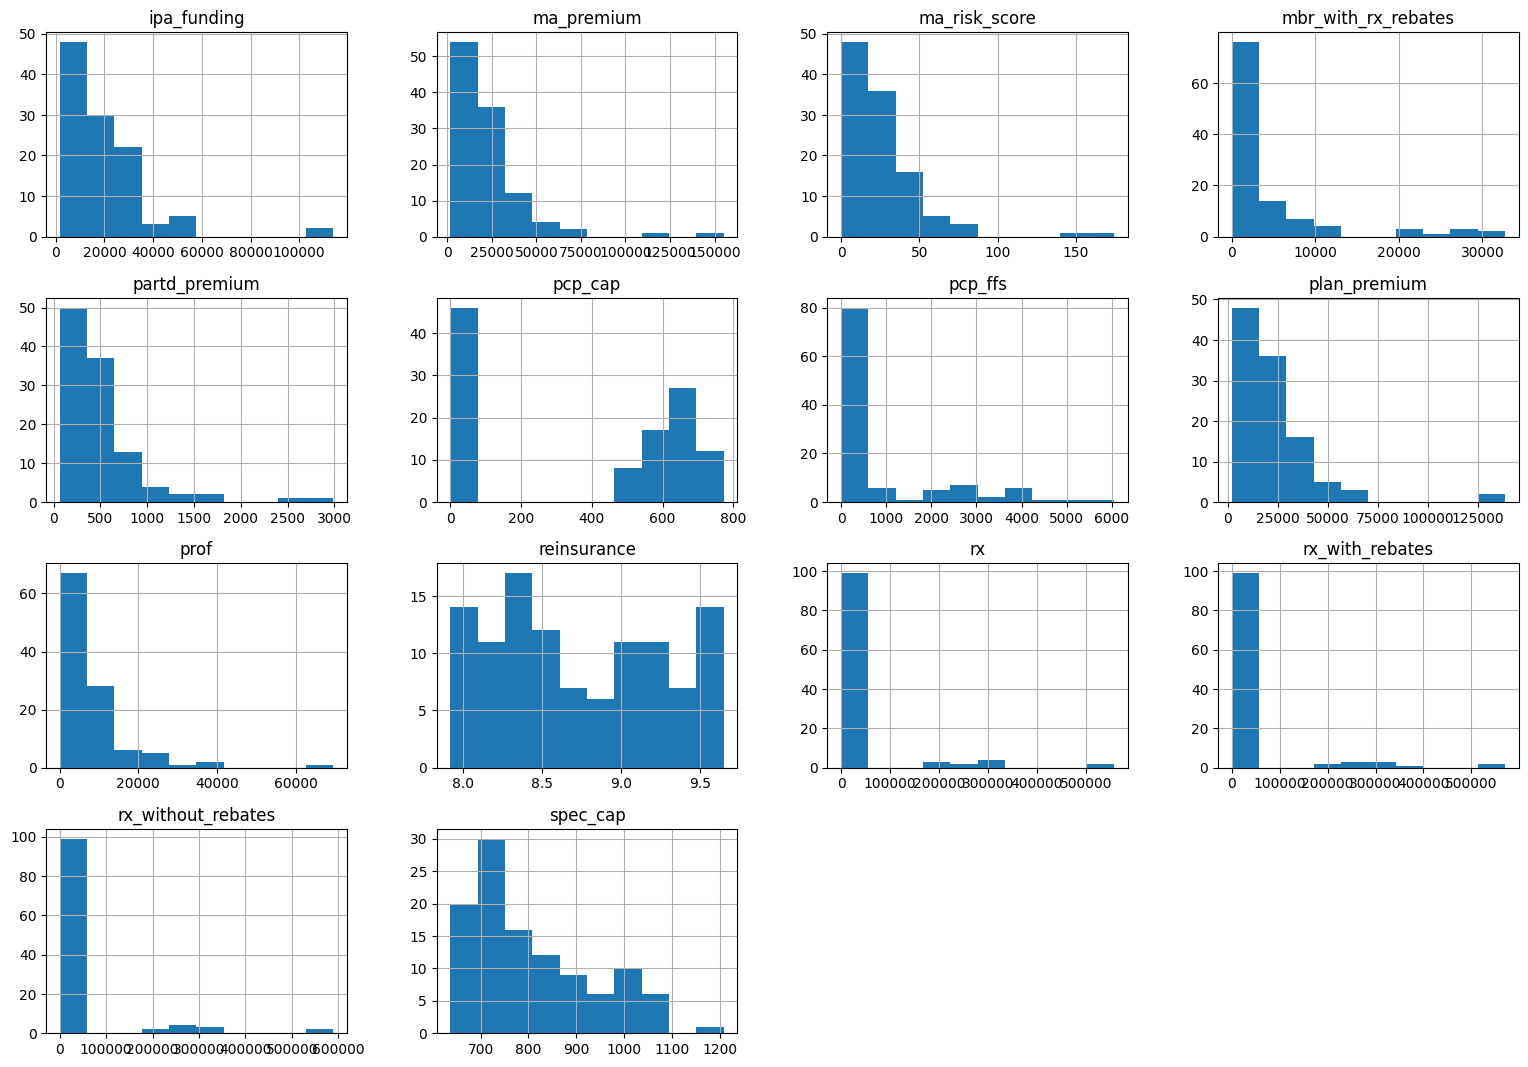

In [53]:
_ = df.iloc[common_idx][financial_columns].hist(figsize=(19, 13))

outliers are more noticeable above than previous histograms we created.